In [ ]:
%tensorflow_version 1.x

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import numpy as np

print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


Using TensorFlow backend.


In [ ]:
import pandas as pd


from google.colab import files
uploaded = files.upload()

import io
cleaned = pd.read_csv(io.BytesIO(uploaded['cleaned.csv']))

display(cleaned)

Saving cleaned.csv to cleaned.csv


,Rented_Bike_Count,Hour,Temp_C,Temp_F,Humidity,Wind_Speed,Visibility,Dew_Point_Temp_C,Dew_Point_Temp_F,Solar_Radiation,Rainfall,Snowfall,HolidayNo Holiday,HolidayHoliday,SeasonsSpring,SeasonsSummer,SeasonsWinter,SeasonsFall,Functioning_DayYes,Functioning_DayNo
0,254,0,-5.2,22.6,37,2.2,2000,-17.6,0.3,0.0,0.0,0.0,1,0,0,0,1,0,1,0
1,204,1,-5.5,22.1,38,0.8,2000,-17.6,0.3,0.0,0.0,0.0,1,0,0,0,1,0,1,0
2,173,2,-6.0,21.2,39,1.0,2000,-17.7,0.1,0.0,0.0,0.0,1,0,0,0,1,0,1,0
3,107,3,-6.2,20.8,40,0.9,2000,-17.6,0.3,0.0,0.0,0.0,1,0,0,0,1,0,1,0
4,78,4,-6.0,21.2,36,2.3,2000,-18.6,-1.5,0.0,0.0,0.0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,39.6,34,2.6,1894,-10.3,13.5,0.0,0.0,0.0,1,0,0,0,0,1,1,0
8756,764,20,3.4,38.1,37,2.3,2000,-9.9,14.2,0.0,0.0,0.0,1,0,0,0,0,1,1,0
8757,694,21,2.6,36.7,39,0.3,1968,-9.9,14.2,0.0,0.0,0.0,1,0,0,0,0,1,1,0
8758,712,22,2.1,35.8,41,1.0,1859,-9.8,14.4,0.0,0.0,0.0,1,0,0,0,0,1,1,0


In [ ]:
x_train = cleaned.drop("Rented_Bike_Count", axis=1)
y_train = pd.DataFrame(cleaned, columns = ['Rented_Bike_Count'])

partial_x_train = x_train[:4500]
x_val = x_train[4501:5000]

partial_y_train = y_train[:4500]
y_val = y_train[4501:5000]

x_test=x_train[5001:]
test_labels=y_train[5001:]

In [ ]:
model = Sequential()
# this layer is a 64-unit (or neuron) ReLU layer, it's the first learning layer
model.add(Dense(264,input_shape = (partial_x_train.shape[1],)))
model.add(Activation('tanh'))
# this layer is a 32-unit (or neuron) ReLU layer, it's the second learning layer
model.add(Dense(264))
model.add(Activation('tanh'))
# this layer is a single-unit (or neuron) Sigmoid layer, it outputs the predicted label
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 264)               5280      
_________________________________________________________________
activation_1 (Activation)    (None, 264)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 264)               69960     
_________________________________________________________________
activation_2 (Activation)    (None, 264)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 265       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 75,505
Trainable params: 

In [ ]:
model.compile(loss='mse',
              optimizer="sgd",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Train on 4500 samples, validate on 499 samples
Epoch 1/100
4500/4500 [==============================] - 0s 89us/step - loss: 549005.1036 - root_mean_squared_error: 745.7086 - val_loss: 2207028.7500 - val_root_mean_squared_error: 845.2863
Epoch 2/100
4500/4500 [==============================] - 0s 21us/step - loss: 548937.3081 - root_mean_squared_error: 813.3190 - val_loss: 2207028.7500 - val_root_mean_squared_error: 845.2683
Epoch 3/100
4500/4500 [==============================] - 0s 20us/step - loss: 548937.2796 - root_mean_squared_error: 826.0574 - val_loss: 2207028.7500 - val_root_mean_squared_error: 845.2622
Epoch 4/100
4500/4500 [==============================] - 0s 20us/step - loss: 548937.3004 - root_mean_squared_error: 831.7227 - val_loss: 2207028.7500 - val_root_mean_squared_error: 845.2592
Epoch 5/100
4500/4500 [==============================] - 0s 20us/step - loss: 548937.3122 - root_mean_squared_error: 834.2295 - val_loss: 2207028.7500 - val_root_mean_squared_error: 845.25

In [ ]:
test_loss, test_acc = model.evaluate(x_test, test_labels)

print('RMSE:', test_acc)

3759/3759 [==============================] - 0s 27us/step
RMSE: 846.5524291992188


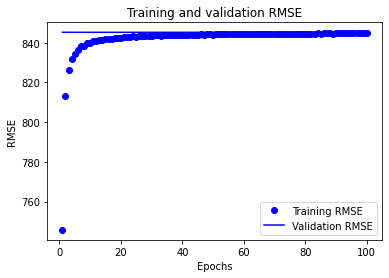

In [ ]:
history_dict = history.history
history_dict.keys()



acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_root_mean_squared_error']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['root_mean_squared_error']
val_acc_values = history_dict['val_root_mean_squared_error']

plt.plot(epochs, acc, 'bo', label='Training RMSE')
plt.plot(epochs, val_acc, 'b', label='Validation RMSE')
plt.title('Training and validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()